In [1]:
from models import PBFTPK, MultiPBFTPK, MainModel
import numpy as np

In [2]:
samples = np.load('samples.npy')

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import MinMaxScaler as Scaler

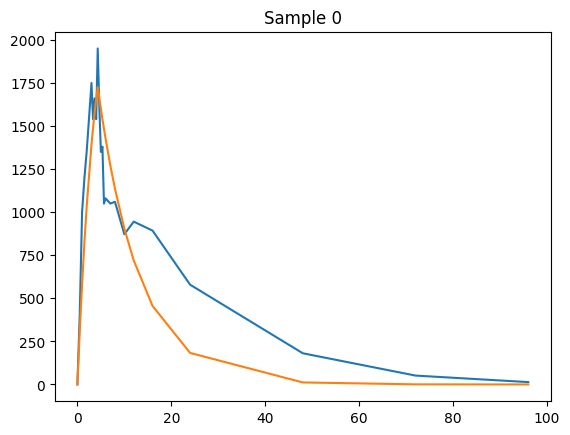

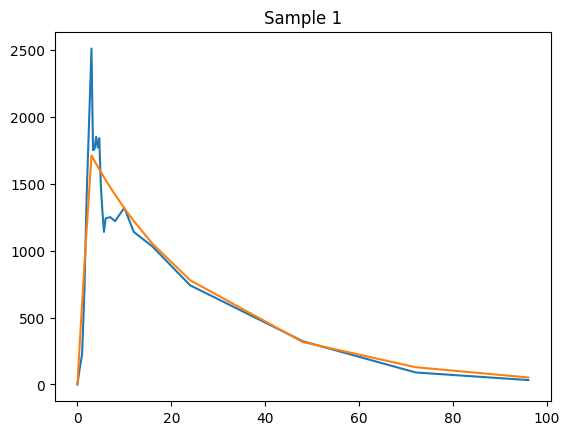

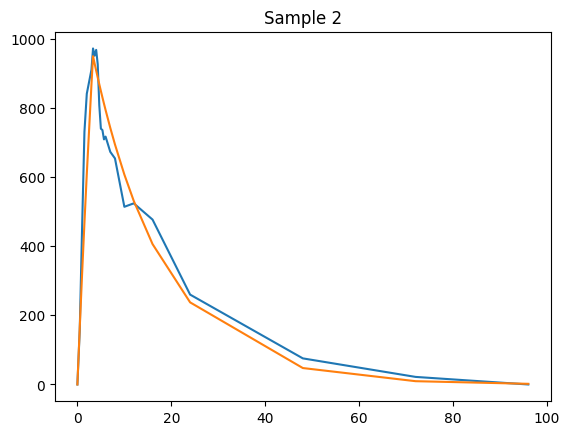

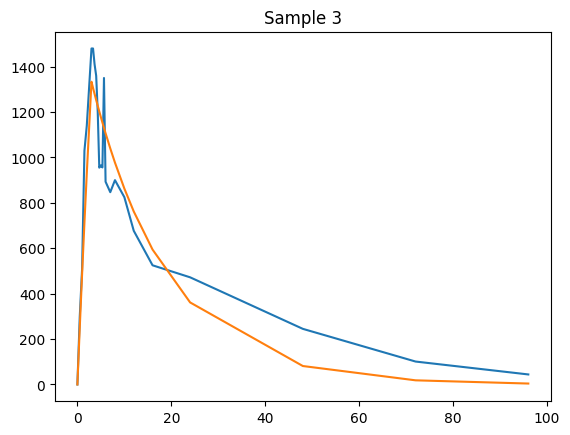

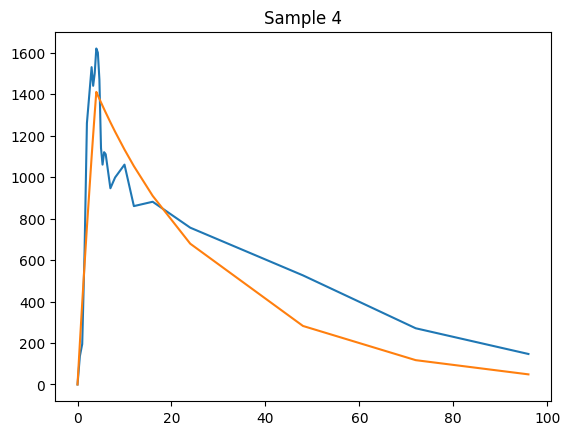

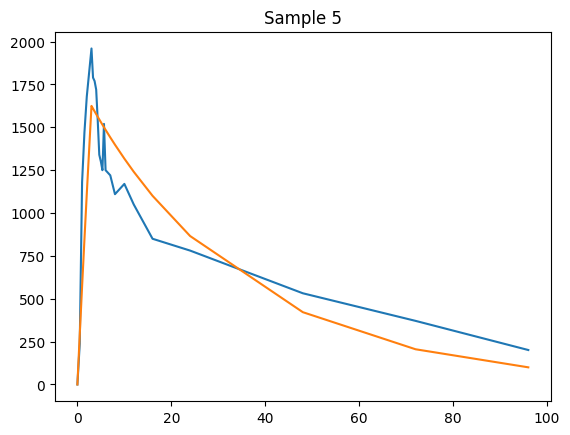

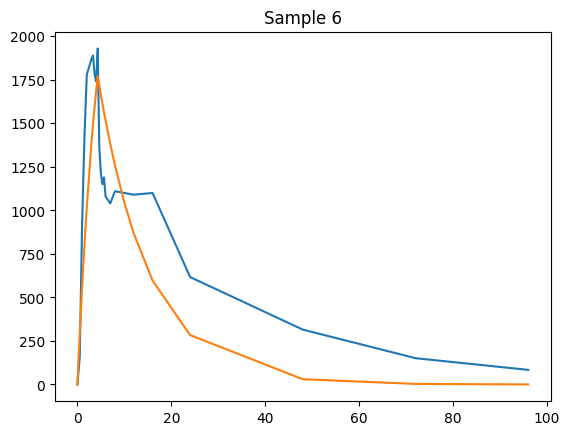

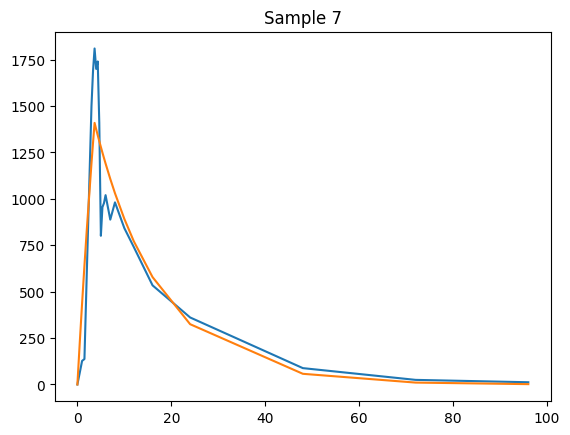

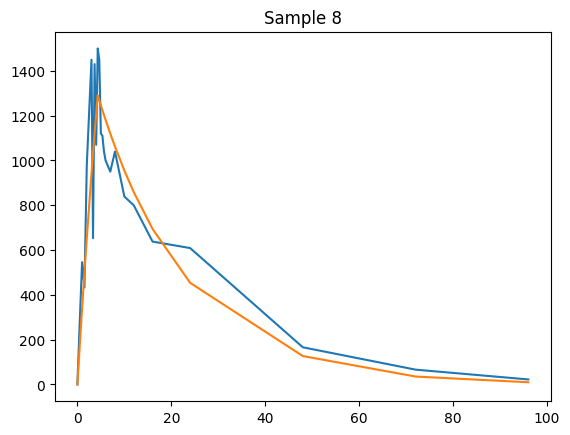

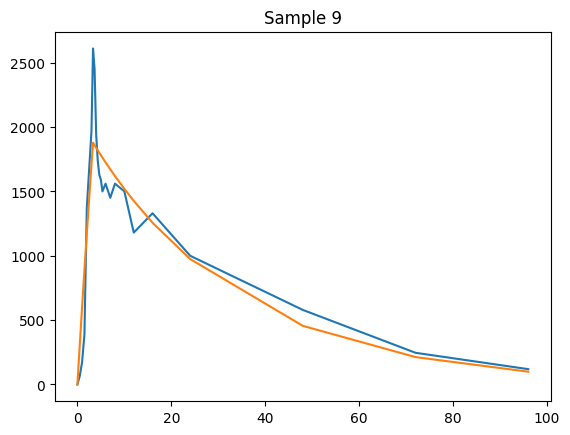

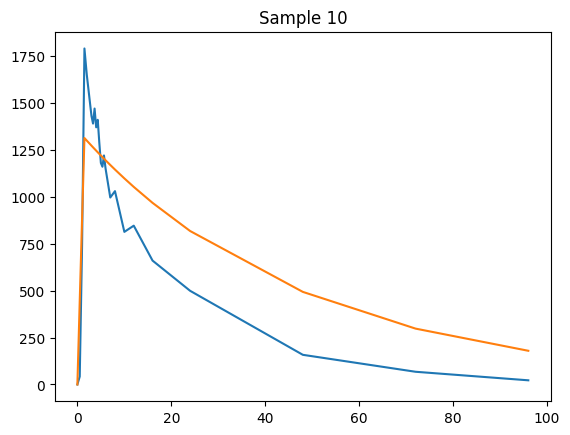

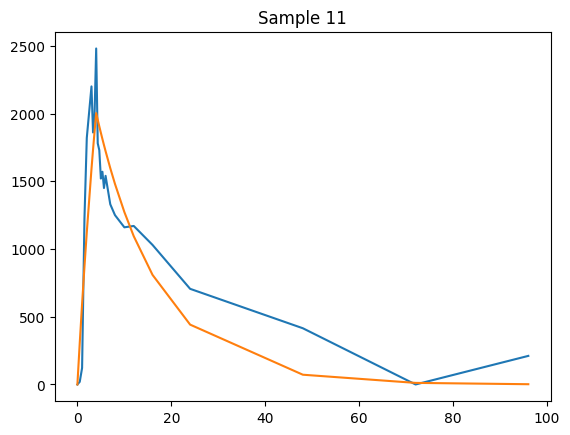

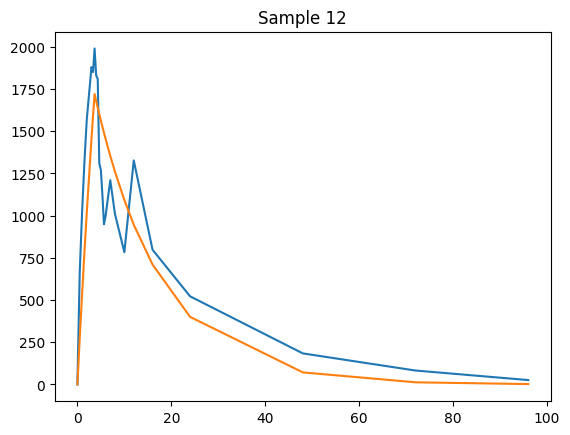

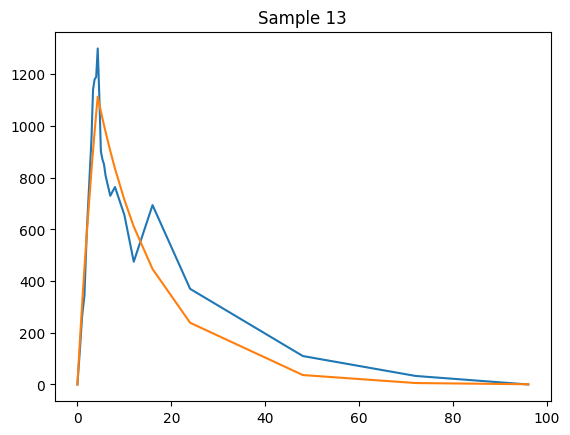

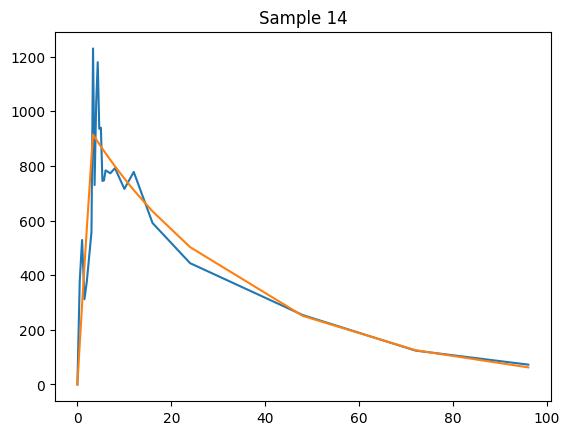

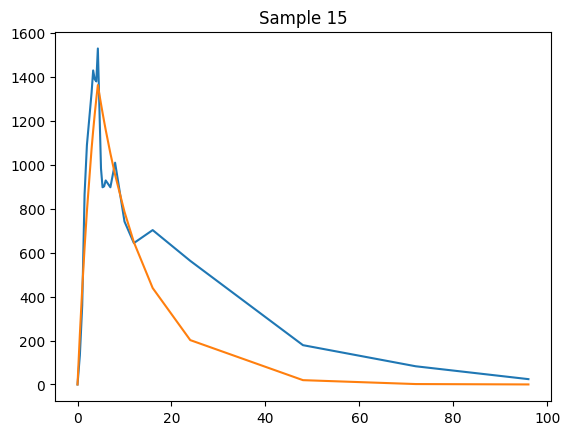

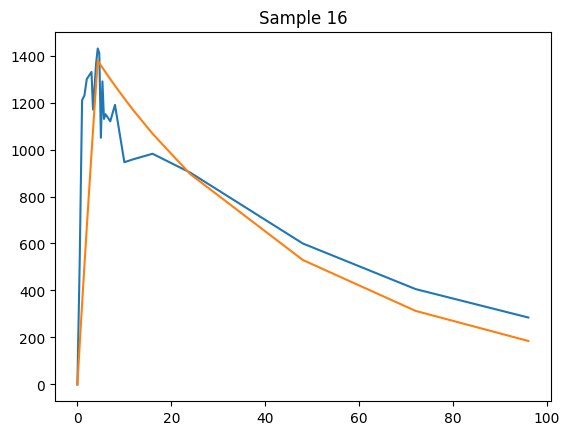

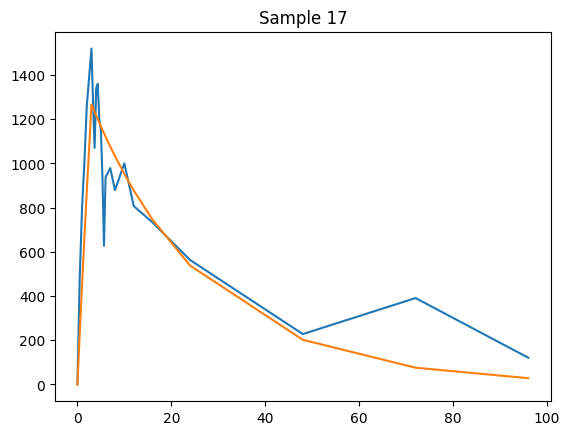

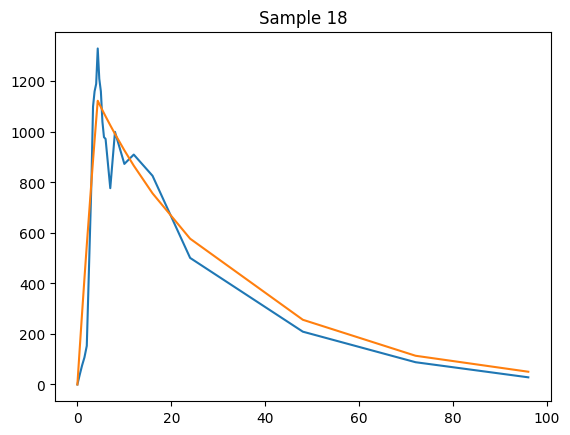

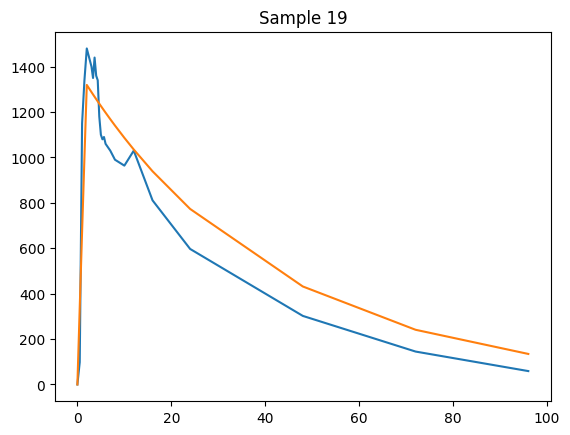

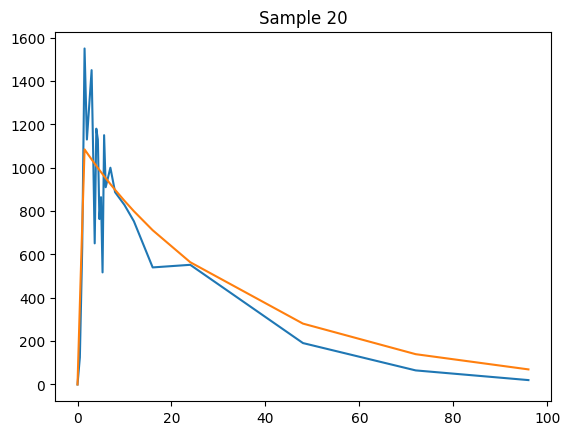

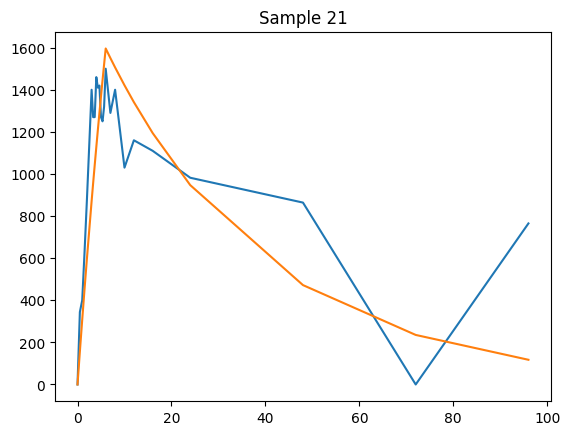

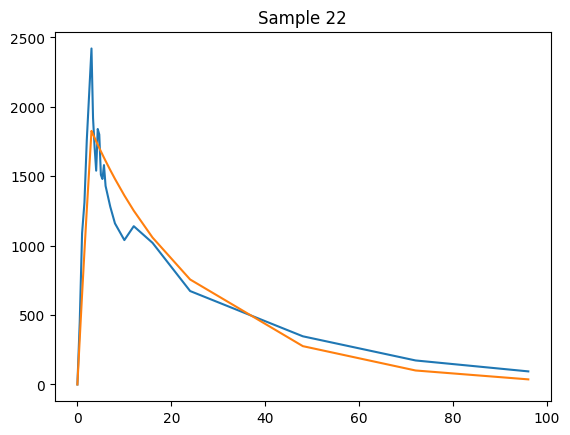

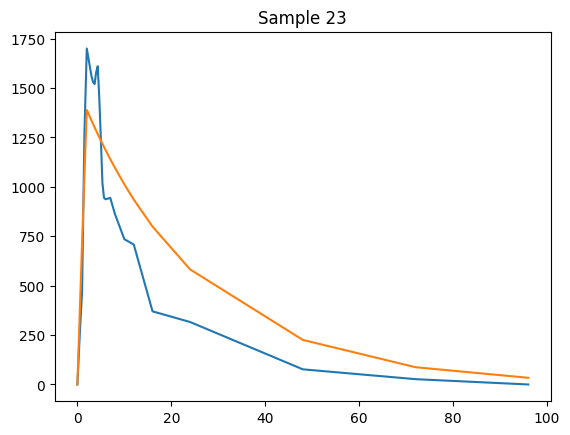

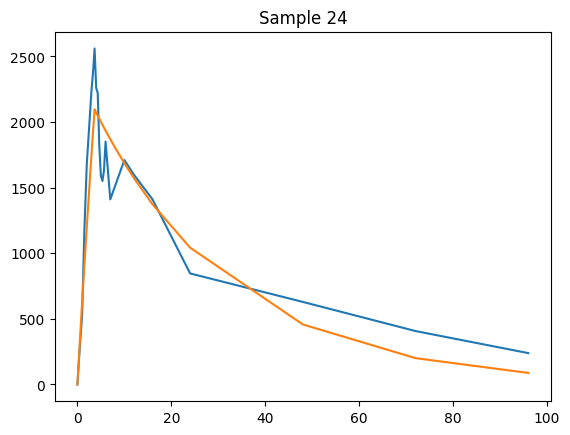

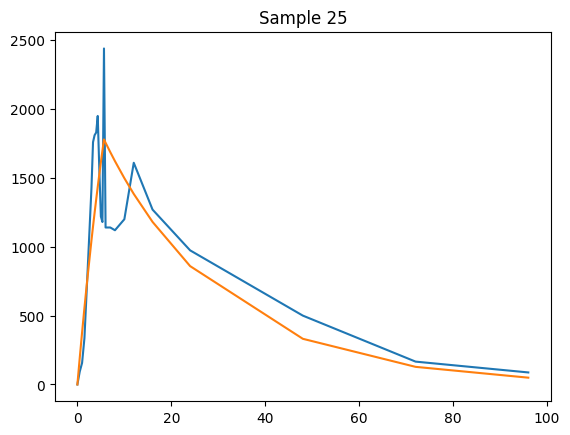

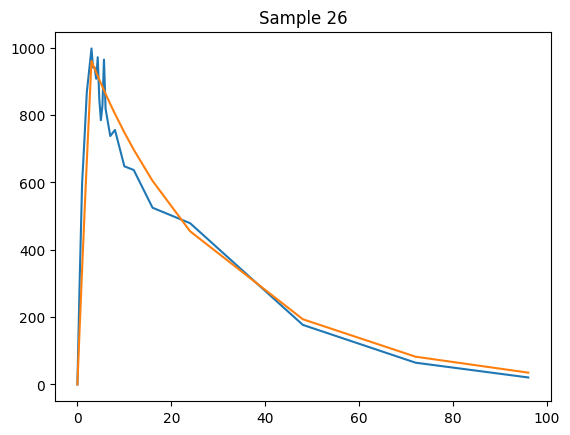

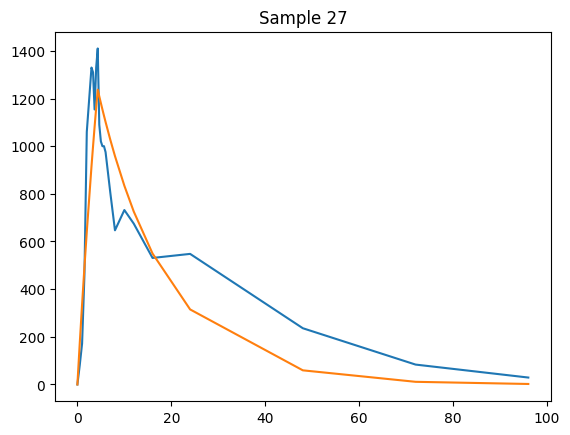

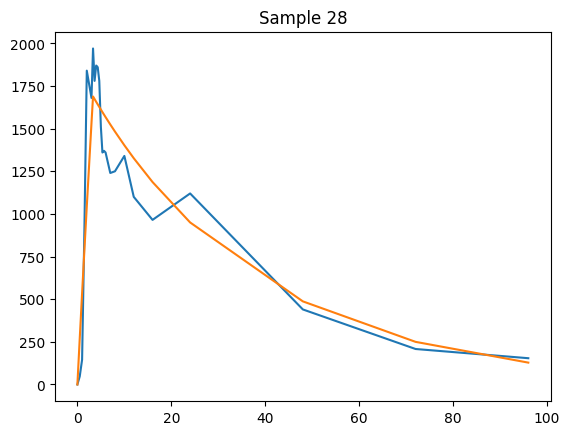

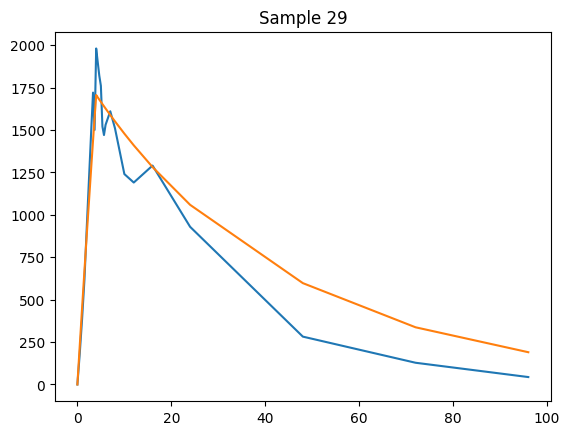

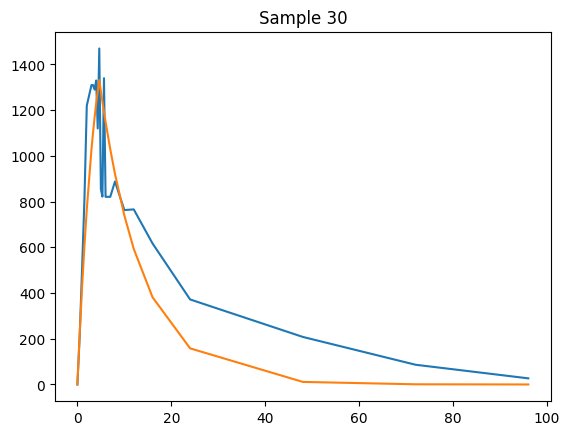

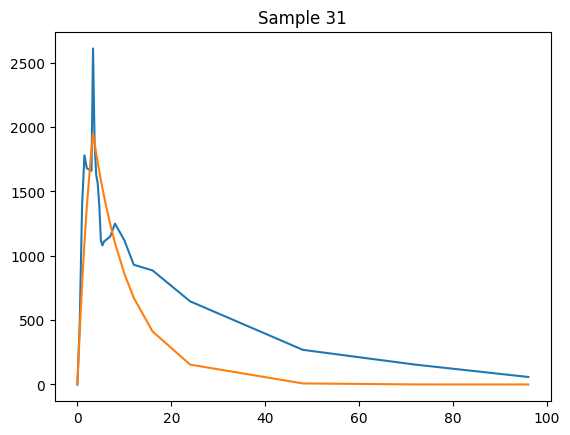

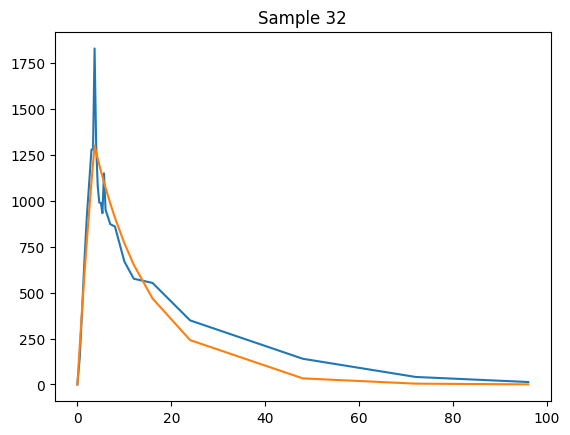

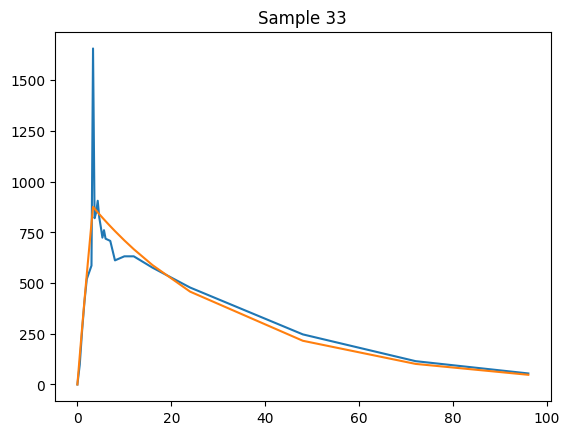

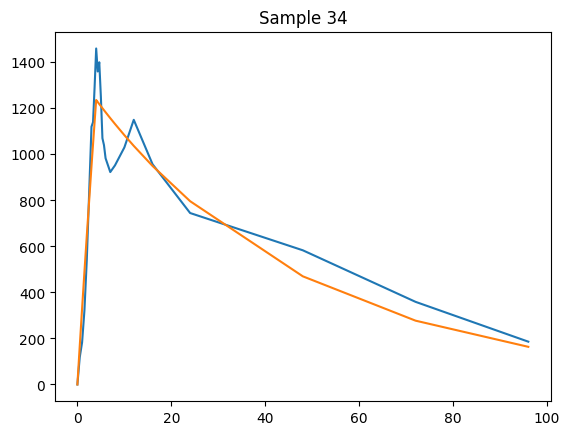

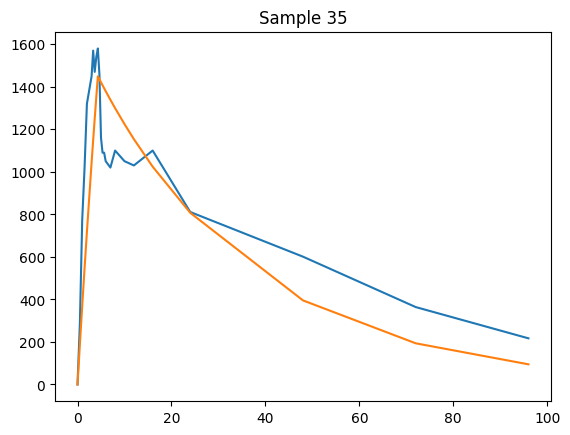

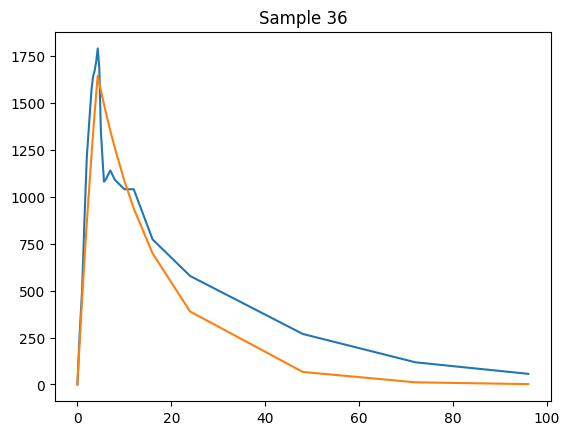

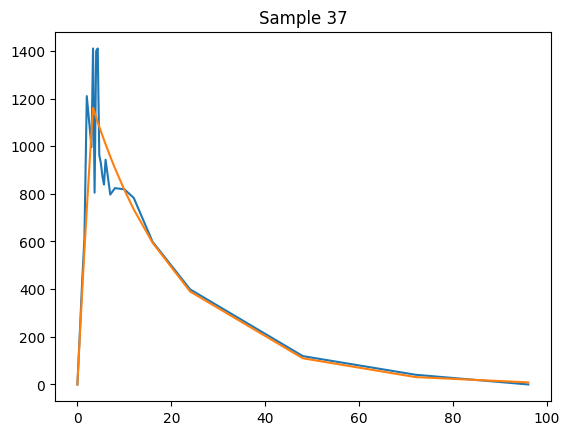

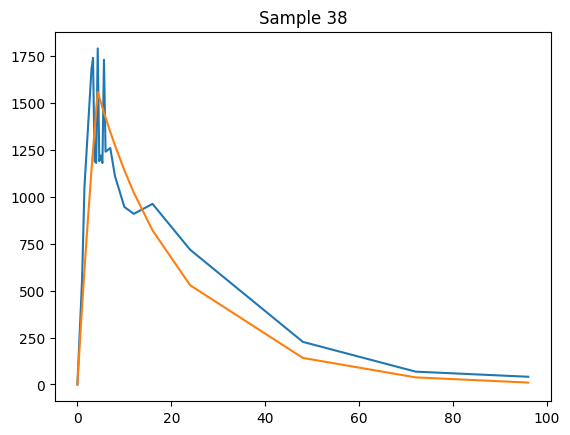

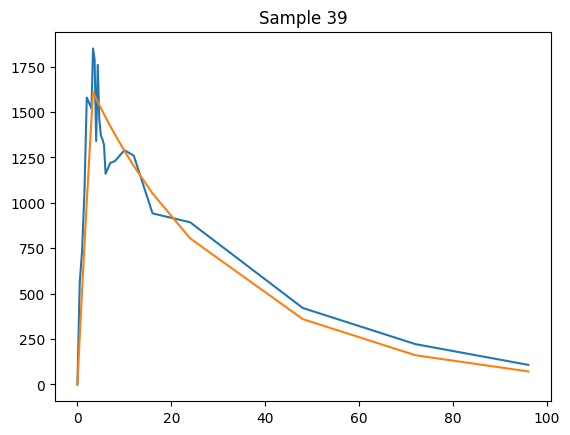

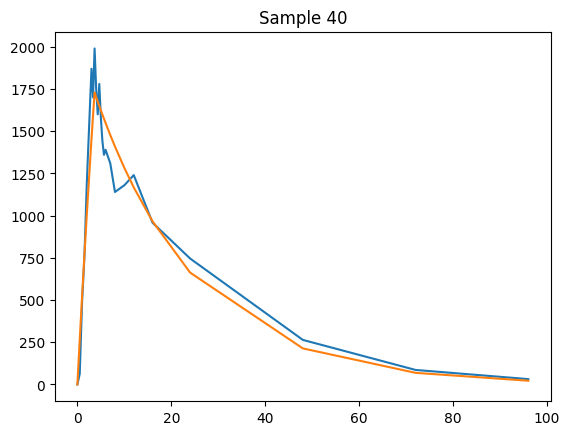

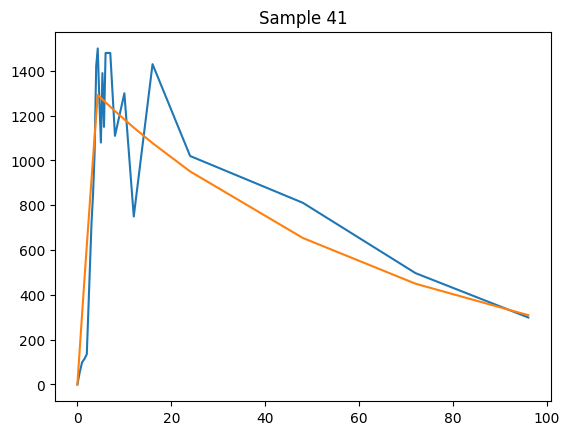

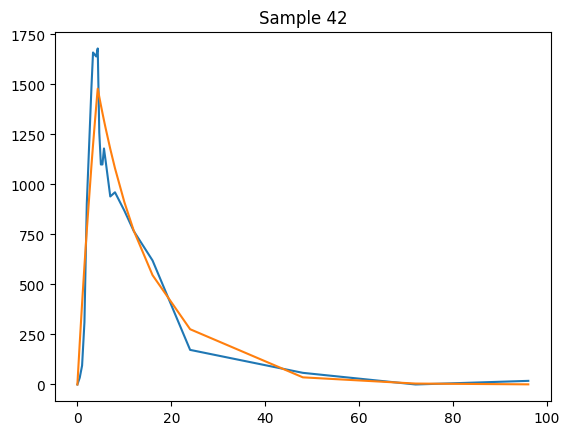

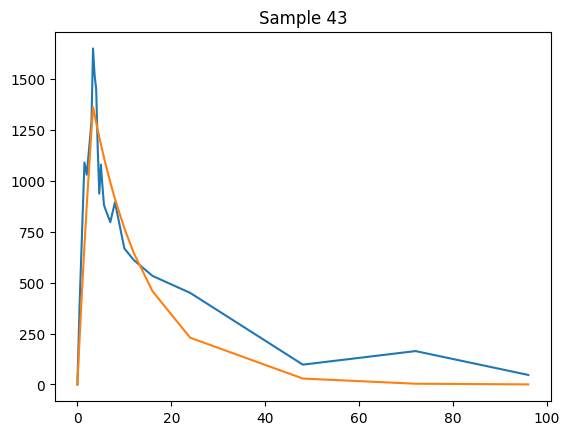

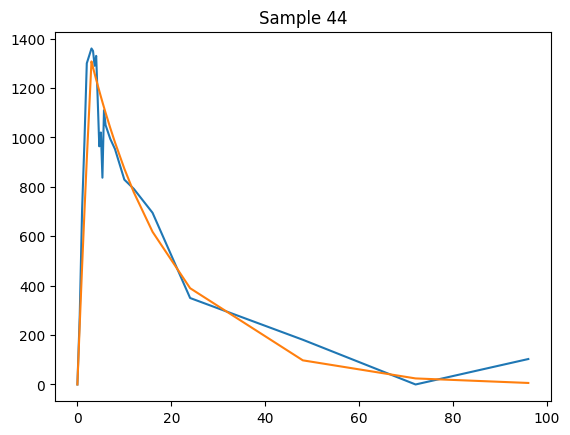

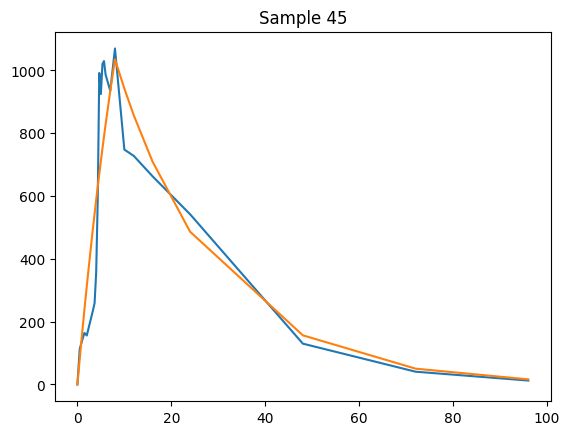

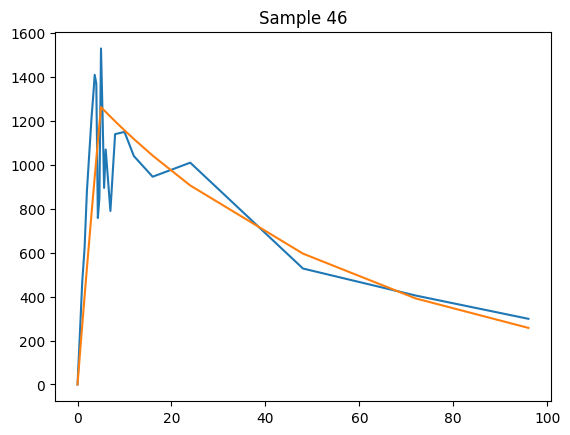

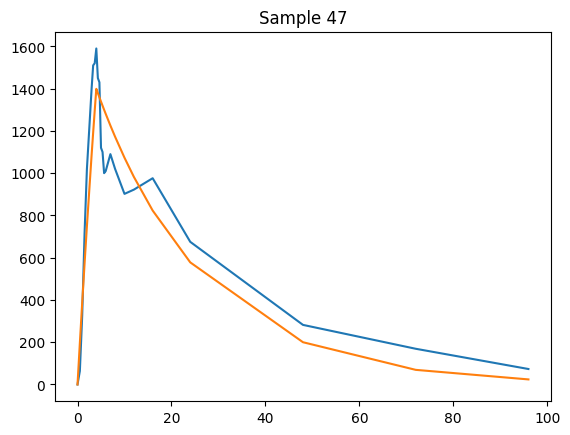

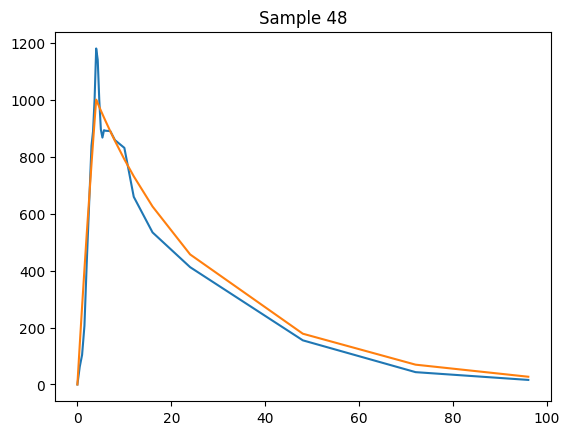

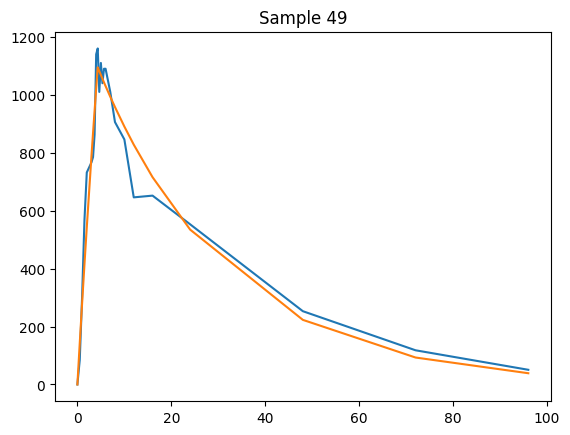

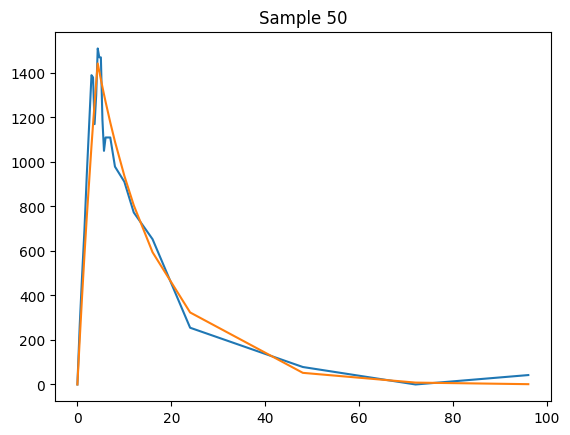

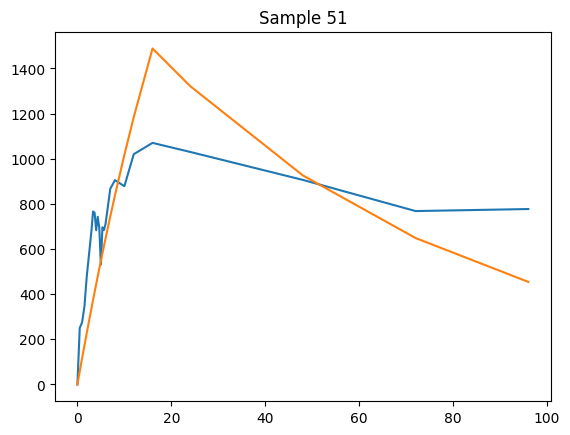

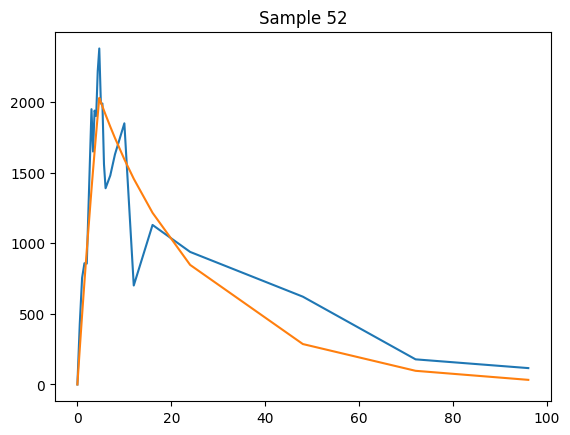

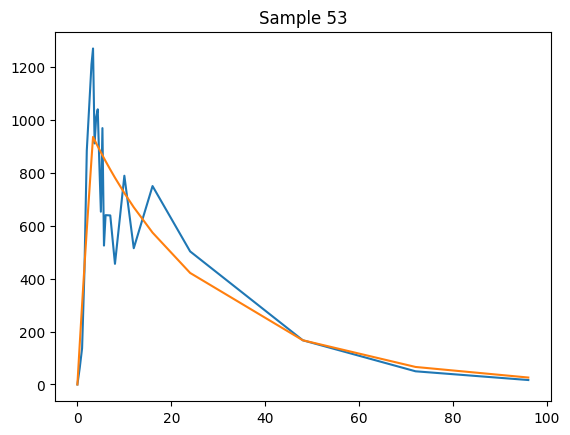

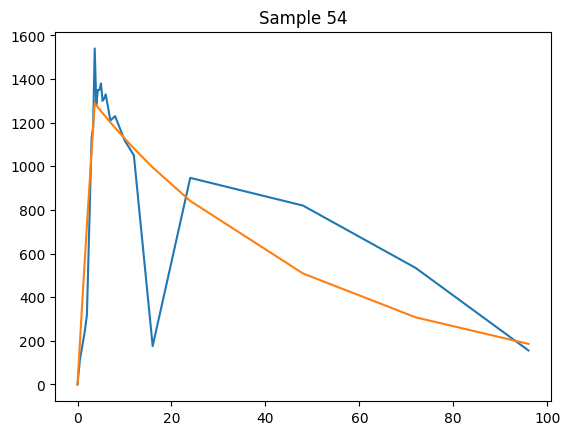

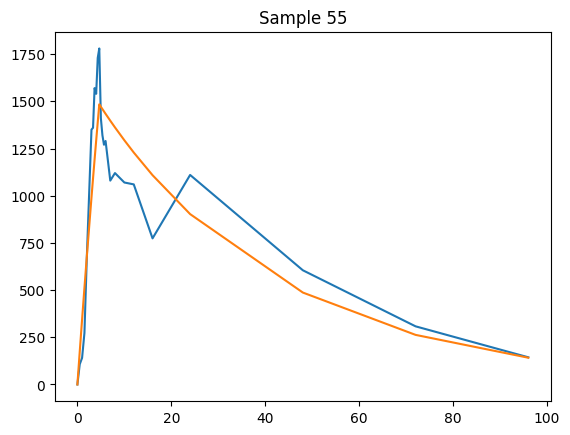

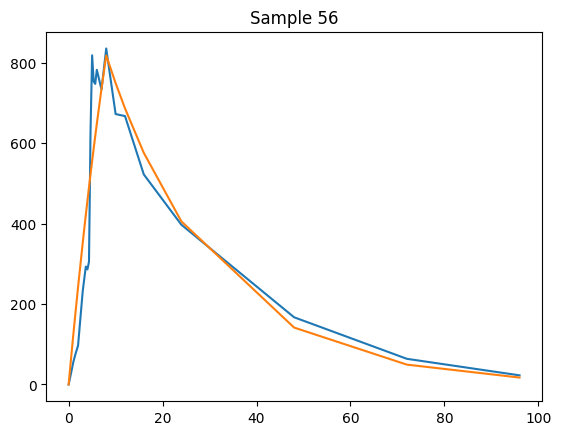

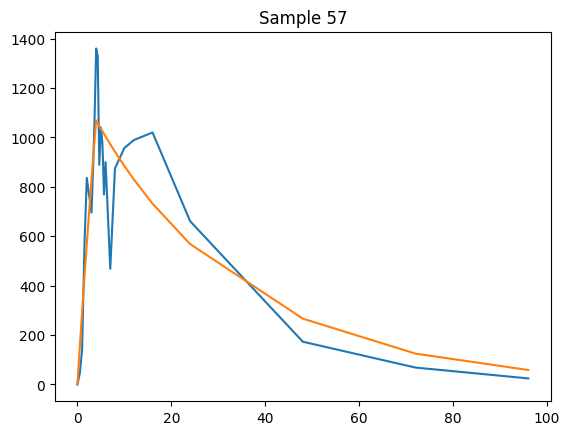

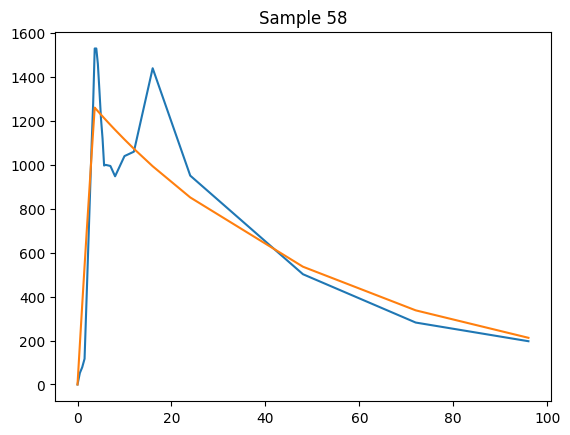

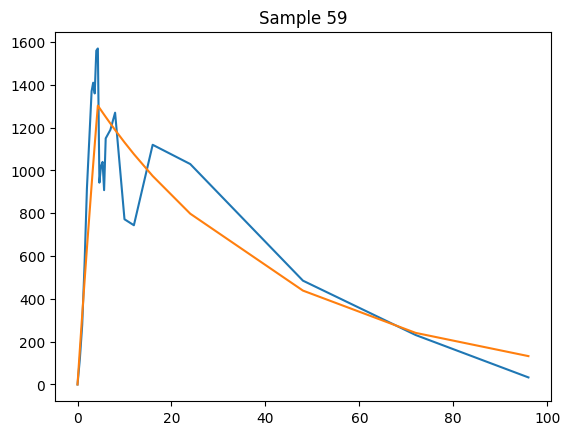

In [5]:
for i, (t, X) in enumerate(samples):
    X_scaler = Scaler().fit(X.reshape((-1, 1)))
    t_scaler = Scaler().fit(t.reshape((-1, 1)))
    X = X_scaler.transform(X.reshape((-1, 1))).reshape((-1))
    t = t_scaler.transform(t.reshape((-1, 1))).reshape((-1))

    multimodel = MultiPBFTPK(tau=[t[np.argmax(X), ]], alpha=[1.0, ])
    multimodel.fit(t, X)
    X_sample = multimodel.sample(t)

    t = t_scaler.inverse_transform(t.reshape((-1, 1))).reshape((-1))
    X = X_scaler.inverse_transform(X.reshape((-1, 1))).reshape((-1))
    X_sample = X_scaler.inverse_transform(
        X_sample.reshape((-1, 1))).reshape((-1))

    plt.title(f"Sample {i}")
    plt.plot(t, X)
    plt.plot(t, X_sample)
    plt.show()